# QuantumSim - The Deutsch-Jozsa algorithm
Author: Nico Kuijpers<br>
Date: October 26, 2024

The Deutsch-Josza algorithm was discovered by David Deutsch and Richard Jozsa and is an early example to demonstrate the power of quantum computing.
The algorithm determines whether an oracle is either "constant" or "balanced". An oracle is "constant" if it returns the same value (either 0 or 1) for all input strings. It is "balanced" if 0 is returned for half of the input strings and 1 for the other half. In this case, an input string consists of a number of bits.

Suppose the input string consists of $n$ bits. Then the number of possible input strings equals $2^n$. In order to be sure whether the oracle is "constant" or "balanced" using classical computing, the oracle should be queried at least $2^{n-1}+1$ times, i.e., one more than half of the number of possible input strings.

The Deutsch-Jozsa algorithm uses only one query to the oracle to determine whether it is "constant" or "balanced". The quantum circuit implementing the algorithm consists of $n+1$ qubits. The oracle is "constant" when the first $n$ qubits are $0$ after measurement, otherwise it must by "balanced".

Below, a possible implementation in QuantumSim is given as well as some examples.

This notebook is based on the following notebook from Qiskit, but uses QuantumSim instead of Qiskit:<br>
https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/algorithms/deutsch_jozsa.ipynb

The original publication of the Deutsch-Jozsa algorithm can be found here:<br>
https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167



In [1]:
from quantumsim import *

In [2]:
'''
Function to create a Deutsch-Jozsa circuit.

Parameters:
    oracle_type: 0 for "constant" oracle and 1 for "balanced" oracle
    n: Number of bits for input string

Returns:
    Circuit: Quantum circuit or n+1 qubits for Deutsch-Jozsa algorithm including oracle
'''
def createDeutschJozsaCircuit(oracle_type:int, n:int):
    
    # Define return value for a "constant" oracle
    oracle_value = np.random.randint(2)

    # Define a hidden parameter for a "balanced" oracle
    a = np.random.randint(1,2**n)
  
    if oracle_type == 0:
        print(f"The oracle returns a constant value {oracle_value}")
    else:
        print("The oracle returns a balanced function")
        

    # Create a circuit of n+1 qubits.
    # Qubits 0 through n-1 are are for querying the oracle and qubit n is for storing the answer
    circuit = Circuit(n+1)

    # Bring all input qubits in superpostion by applying the Hadamard gate
    for q in range(n):
        circuit.hadamard(q)

    # Flip qubit n and apply the Hadamard gate.
    circuit.pauli_x(n)
    circuit.hadamard(n)
        
    # The oracle is "constant" if oracleType equals 0, else it is "balanced"
    if oracle_type == 0:
        # If the oracleType is "constant" it returns oracle_value for all input. 
        if oracle_value == 1:
            circuit.pauli_x(n)
        else:
            circuit.identity(n)
    else: 
        # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
        for q in range(n):
            if (a & (1 << q)):
                circuit.cnot(q,n)

    # Apply Hadamard gates after querying the oracle
    for q in range(n):
        circuit.hadamard(q)

    # Return the Deutsch-Josza circuit
    return circuit

## Example: constant oracle
Below a Deutsch-Jozsa circuit of 5 qubits is created with a constant oracle. Since the oracle is constant, qubits 0, 1, 2, and 3 should be 0 upon measurement, while qubit 4 is either 0 or 1.

The oracle returns a constant value 1


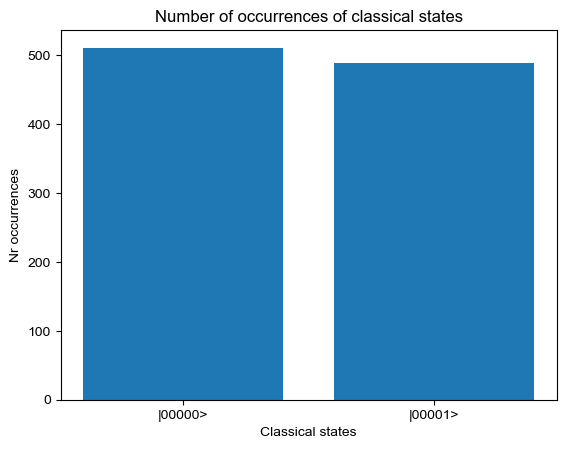

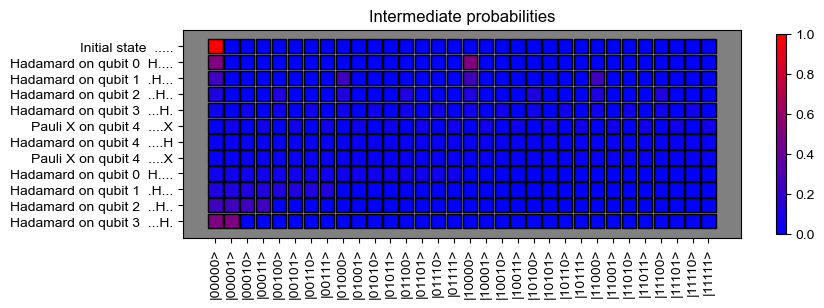

In [3]:
circuit = createDeutschJozsaCircuit(0,4)
result = QuantumUtil.measure_circuit(circuit,1000)
QuantumUtil.histogram_of_classical_states(result)
QuantumUtil.show_all_probabilities(circuit)

## Example: balanced oracle
Below a Deutsch-Jozsa circuit of 5 qubits is created with a balanced oracle. Since the oracle is balanced, not all qubits 0, 1, 2, and 3 should be 0 upon measurement.

The oracle returns a balanced function


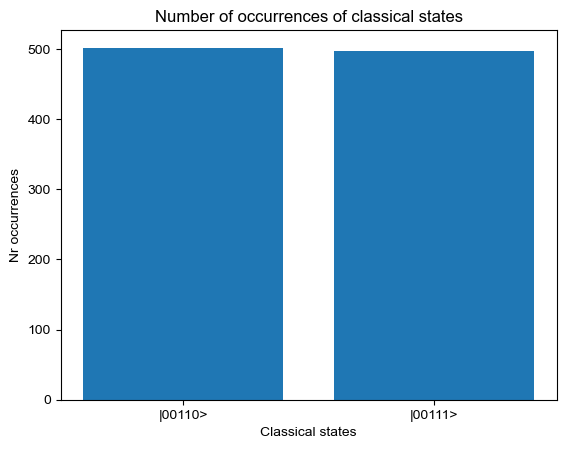

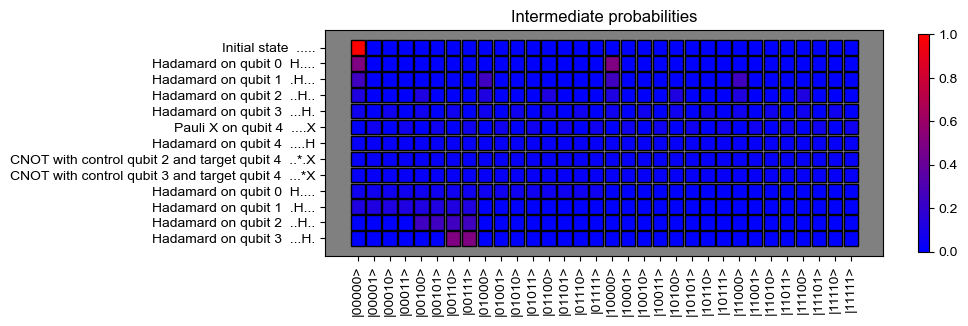

In [4]:
circuit = createDeutschJozsaCircuit(1,4)
result = QuantumUtil.measure_circuit(circuit,1000)
QuantumUtil.histogram_of_classical_states(result)
QuantumUtil.show_all_probabilities(circuit)

## Example: random oracle
Below a random number is drawn to determine the oracle type. The number of bits for the input string is 10.

The oracle returns a balanced function


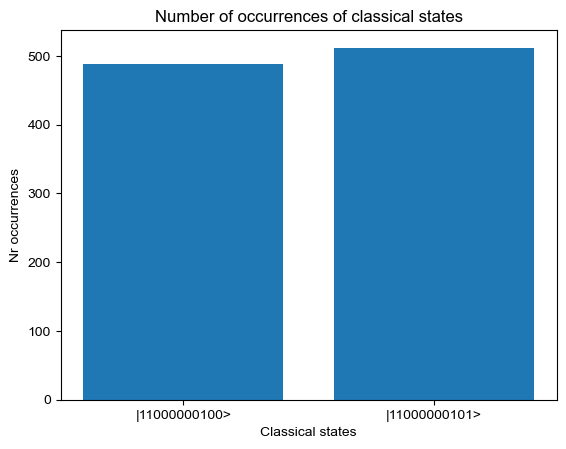

In [5]:
oracle_type = np.random.randint(2)
circuit = createDeutschJozsaCircuit(oracle_type=oracle_type,n=10)
result = QuantumUtil.measure_circuit(circuit,1000)
QuantumUtil.histogram_of_classical_states(result)